In [2]:
import os
import numpy as np

data_path=r'C:\Users\lenov\Downloads\ep3\dataset'

categories=os.listdir(data_path)
print(categories)
labels=[i for i in range(len(categories))]
print(labels)
category_dict={'a':0,'ae':1,'e':2,'u':3}
print(category_dict)

['a', 'ae', 'e', 'u']
[0, 1, 2, 3]
{'a': 0, 'ae': 1, 'e': 2, 'u': 3}


In [25]:
import cv2

data = []
target = []

for category in categories:
    imgs_path = os.path.join(data_path, category)
    img_names = os.listdir(imgs_path)
    print(category, '---------------------')

    for img_name in img_names:
        img_path = os.path.join(imgs_path, img_name)

        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (8, 8))

        data.append(img)
        target.append(category_dict[category])

        cv2.imshow('LIVE', img)
        k = cv2.waitKey(100)
        if k == 27:   # ESC key
            break

cv2.destroyAllWindows()


a ---------------------
ae ---------------------
e ---------------------
u ---------------------


In [23]:
print(len(data),len(target))

270 270


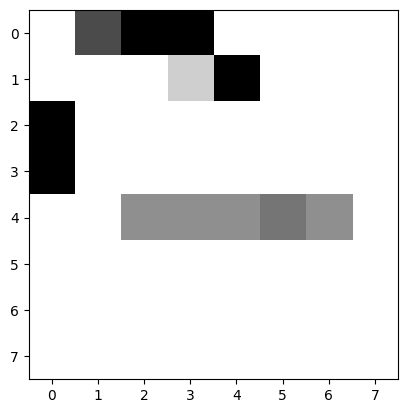

In [26]:
from matplotlib import pyplot as plt

plt.imshow(data[220],cmap='gray')

In [27]:
data[10]

array([[255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255,   6, 255,   0, 255],
       [255, 255, 255,   0,   0,   0,   0, 255],
       [255, 255,  95, 255, 255,   0, 255,  46],
       [255, 255, 255, 255, 255,   0, 255, 255],
       [255, 255, 255, 255, 255,   0, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

In [28]:
target[220]

3

In [29]:
data=np.array(data)
print('before resize:',data.shape)

before resize: (270, 8, 8)


In [30]:
ata=np.array(data)
print('before resize:',data.shape)
data=data.reshape(data.shape[0],data.shape[1]*data.shape[2])
#data=data.reshape(270,8*8)
print('after resize:',data.shape)
target=np.array(target)

np.save('data',data)
np.save('target',target)

before resize: (270, 8, 8)
after resize: (270, 64)


In [31]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [32]:
print(data.shape)
print(target.shape,target)

(270, 64)
(270,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3]


In [33]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [34]:
print(train_data.shape,train_target.shape)
print(test_data.shape,test_target.shape)

(216, 64) (216,)
(54, 64) (54,)


In [36]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier() #load KNN algorithm into model

In [37]:
model.fit(train_data,train_target) #training the KNN model using traininig data and target

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [38]:
predicted_target=model.predict(test_data) #getting predictions from the model
print(predicted_target)

[2 3 2 0 0 2 3 2 0 0 1 0 3 0 2 1 2 0 1 3 3 1 0 0 0 1 3 2 0 2 3 1 3 3 3 0 3
 1 1 2 2 2 3 3 1 0 0 0 1 3 2 2 2 0]


In [39]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target,predicted_target)
print('Accuracy:',acc)

Accuracy: 0.8333333333333334


In [40]:
from sklearn.metrics import classification_report

classi_report=classification_report(test_target,predicted_target)
print('Classification Report:',classi_report)

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.80      0.80      0.80        10
           2       0.79      0.92      0.85        12
           3       0.93      0.81      0.87        16

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54



In [41]:
import joblib

joblib.dump(model,'sinhala-character-knn.sav')

['sinhala-character-knn.sav']

In [42]:
import os
os.getcwd()

'C:\\Users\\lenov'

In [43]:
import os

filename = "sinhala-character-knn.sav"

for root, dirs, files in os.walk("C:/Users/lenov"):  # start folder
    if filename in files:
        print("File found at:", os.path.join(root, filename))


File found at: C:/Users/lenov\sinhala-character-knn.sav
File found at: C:/Users/lenov\Downloads\ep3\sinhala-character-knn.sav
